Let's analyse the CSV file provided by the people who wrote the [33 year summary](https://fahrplan.events.ccc.de/congress/2016/Fahrplan/events/8266.html).

The raw data is here:
https://gitlab.com/maxigas/cccongresstalks/blob/master/cccongresstalks.csv

In [1]:
import pandas as pd

In [10]:
url = "https://gitlab.com/maxigas/cccongresstalks/raw/master/cccongresstalks.csv"

In [16]:
df = pd.read_csv(url, sep='|', engine='c', error_bad_lines=False)

In [35]:
df = df.replace(to_replace=pd.np.nan, value="")

In [36]:
df

,year,congress,title,abstract,link,tags
0,1984,1C3,Kommunikation über den Computer. Grundwissen,Workshop,,t
1,1984,1C3,Datex und ähnliche Netzwerke,Workshop,,t
2,1984,1C3,Professionelle Mailboxen: Konzepte und Beispiele,Workshop,,t
3,1984,1C3,Bedienerfreundlichkeit und Datenschutz in Mail...,Diskussion,,t
4,1984,1C3,Psychische Störungen durch Computermißbrauch,Workshop,,s
5,1984,1C3,Offene Netze. 15 Jahre Erfahrung aus den USA,Workshop,,s/t
6,1984,1C3,Rund um Bildschrimtext,Workshop,,t
7,1984,1C3,Einführung ins Telefonsystem,Workshop,,t
8,1984,1C3,Datenfunk,Workshop,,t
9,1984,1C3,Jura für Hacker,Workshop,,s


Now that we have loaded the data, let's do some statistics.

First, the number of talks by year.

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [38]:
gb = df.groupby(by='year')

In [39]:
gb.congress.count().describe()

count     31.000000
mean      79.032258
std       58.214823
min        3.000000
25%       26.000000
50%       88.000000
75%      105.000000
max      214.000000
Name: congress, dtype: float64

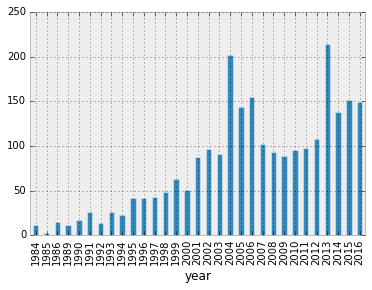

In [40]:
gb.congress.count().plot.bar()

We can do the same thing by average summary length.

In [42]:
df['abstract_len'] = df['abstract'].apply(lambda s: len(s))

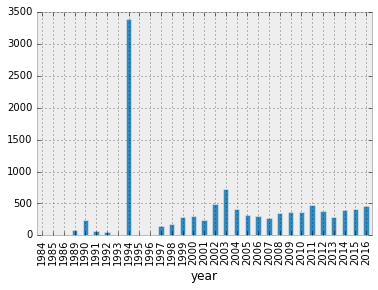

In [44]:
df.groupby(by='year').abstract_len.mean().plot.bar()

There seems to be some anomaly in 1994: apparently whole talks got embedded instead of just abstracts.

(0, 1000)

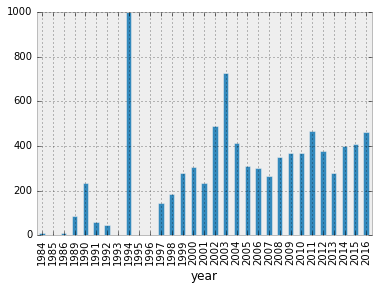

In [46]:
df.groupby(by='year').abstract_len.mean().plot.bar()
plt.ylim(0, 1000)

Now, let's do some statistics about the abstracts. What are some popular words?

In [49]:
from collections import Counter

In [143]:
all_abstracts = df.abstract.str.lower().str.split('\s').sum()
c = Counter(all_abstracts)

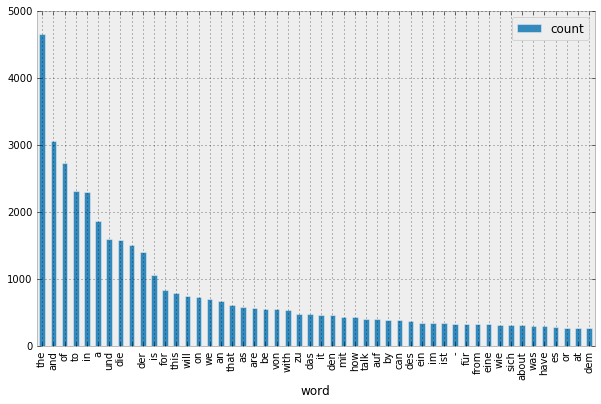

In [144]:
fig, ax = plt.subplots(figsize=(10, 6))
pd.DataFrame((c.most_common(50)), columns=['word', 'count']).set_index('word').plot.bar(ax=ax)

Not super useful. Let's do a wordcloud.

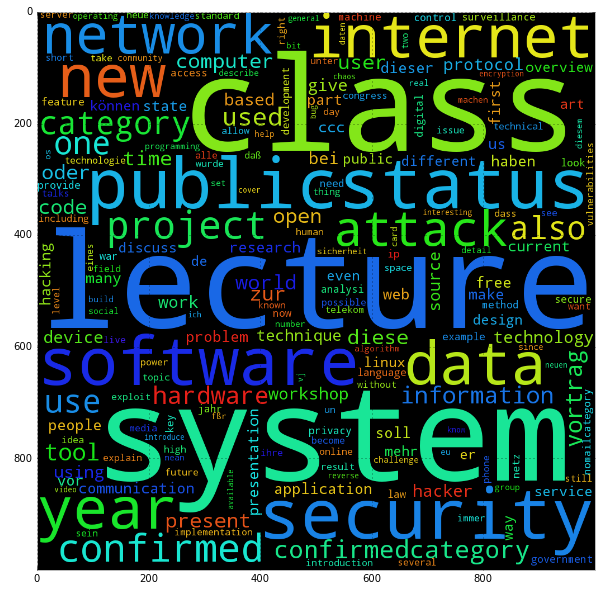

In [147]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=1000).generate(" ".join(all_abstracts))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)

Actually still not useful. Let's eliminate stopwords.

(-0.5, 999.5, 999.5, -0.5)

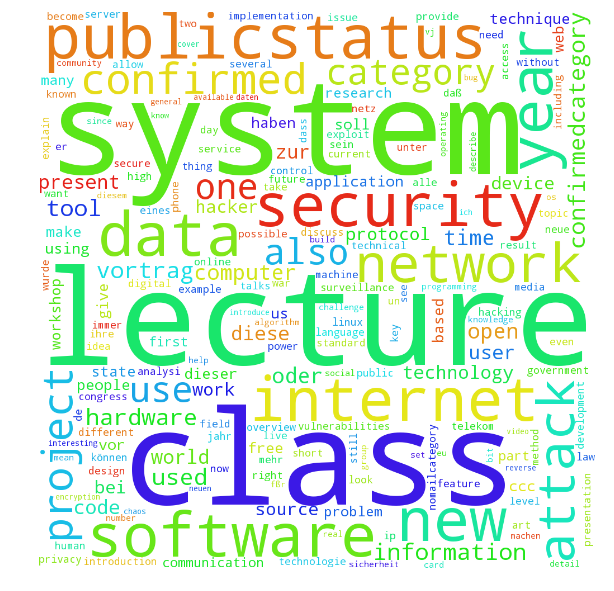

In [148]:
from wordcloud import STOPWORDS
STOPWORDS.update(['und', 'die', 'zu', 'auf', 'der', 'von', 
                  'das', 'den', 'ein', 'dem', 'im', 'auch', 
                  'noch', 'ist', 'es', 'mit', 'talk', 'des', 
                  'wie', 'sich', 'wir', 'will', 'für', 'nicht', 'um', 'als',
                 'wird', 'werden', 'eine', 'über', 'sie', 'wenn', 'durch', 'aber', 'dabei',
                 'zum', 'aus', 'sind', 'nur', 'gibt', 'einer', '-', 'show', 'hat', 'man', 
                 'einem', 'welche', 'kann', 'einen', 'last', 'well', 'nach'])
wordcloud = WordCloud(background_color='white', width=1000, height=1000, stopwords=STOPWORDS).generate(" ".join(all_abstracts))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

We can try to generate one of these wordclouds for each year of the Congress.

In [153]:
wordclouds = {}
for year in df.year.unique():
    abstracts = " ".join(df.abstract[df.year == year].str.lower().str.split('\s').sum())
    if len(abstracts.strip()) > 0:
        wordcloud = WordCloud(background_color='white', width=1000, height=1000, stopwords=STOPWORDS).generate(abstracts)
        wordclouds[year] = wordcloud
    print(year)

1984
1985
1986
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


Let's now display this interactively:

In [137]:
from ipywidgets import interact

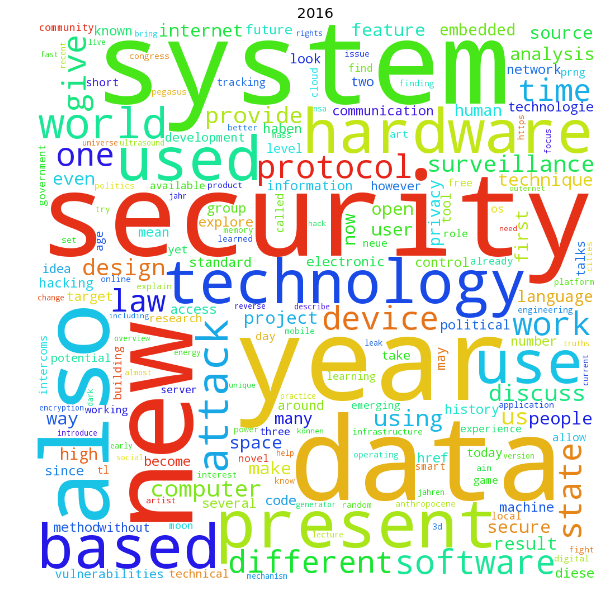

In [154]:
@interact
def display_year(year_index=[0, len(wordclouds.keys()) - 1]):
    "Displays each wordcloud by year."
    year = list(wordclouds.keys())[year_index]
    wordcloud = wordclouds[year]
    plt.figure(figsize=(10, 10))
    plt.title(year)
    plt.imshow(wordcloud)
    plt.axis('off')